In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('trai.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
df=df[['Age','Fare','Survived']]

In [6]:
df.head(2)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1


In [7]:
y=df['Survived']
X= df.drop('Survived',axis=1)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train['age_imputation']=X_train['Age']
X_test['age_imputation']=X_test['Age']

In [10]:
X_train

,Age,Fare,age_imputation
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [11]:
X_train['age_imputation'][X_train['age_imputation'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


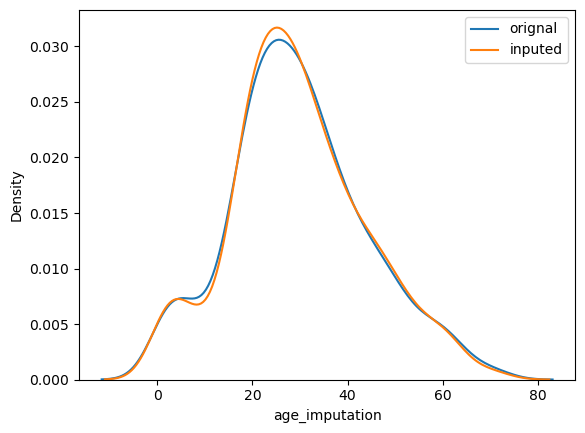

In [12]:
sns.distplot(X_train['Age'],label='orignal',hist=False)
sns.distplot(X_train['age_imputation'],label='inputed',hist=False)
plt.legend();

In [13]:
X_train.cov()

,Age,Fare,age_imputation
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,52.394718
age_imputation,204.349513,52.394718,199.633323


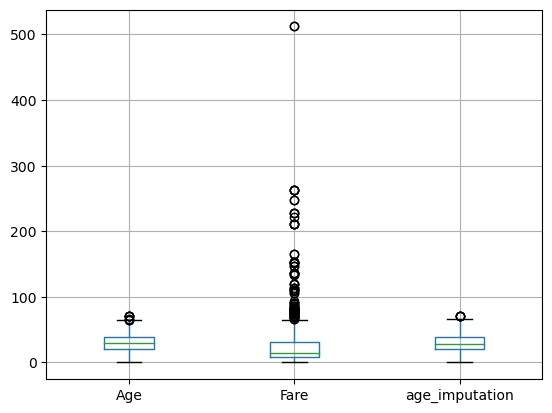

In [14]:
X_train.boxplot();

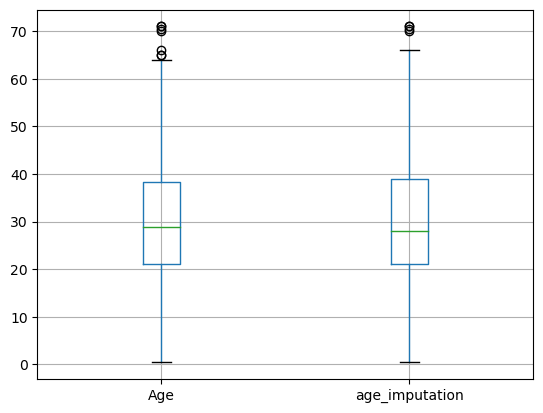

In [15]:
X_train[['Age','age_imputation']].boxplot();

In [16]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [17]:
df = pd.read_csv('trai.csv')[['Age','Pclass','Fare','Survived']]

In [18]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [19]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [22]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [23]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [24]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

In [25]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
df = np.round(pd.read_csv(r'C:\Users\AmiteshOP\Downloads\50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [26]:
df = df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [27]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

C:\Users\AmiteshOP\AppData\Local\Temp\ipykernel_16984\2040708130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1,0] = np.NaN
C:\Users\AmiteshOP\AppData\Local\Temp\ipykernel_16984\2040708130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3,1] = np.NaN
C:\Users\AmiteshOP\AppData\Local\Temp\ipykernel_16984\2040708130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-1,-1] = np.NaN


In [28]:

# Step 1 - Impute all missing values with mean of respective col

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [29]:
# 0th Iteration
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [30]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [31]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [32]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [33]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [34]:
df1.iloc[1,0] = 23.14
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [35]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


In [36]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [37]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [38]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [39]:
df1.iloc[3,1] = 11.06

In [40]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [41]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [42]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [43]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [44]:
df1.iloc[4,-1] = 31.56

In [45]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


In [46]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


In [47]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [48]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.78627207])

In [49]:
df2.iloc[1,0] = 23.78

In [50]:
df2.iloc[3,1] = 11.22
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

df2.iloc[4,-1] = 31.56
df2

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,31.56


In [51]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.0
37,0.64,0.00,0.0
2,0.00,0.00,0.0
14,0.00,0.16,0.0
44,0.00,0.00,0.0


In [52]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,31.56


In [53]:

X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.57698058])

In [54]:
df3.iloc[1,0] = 24.57

In [55]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37282844])

In [56]:
df3.iloc[3,1] = 11.37

In [57]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.53976417])

In [58]:
df3.iloc[4,-1] = 45.53
df2.iloc[3,1] = 11.22
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,24.57,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.37,26.00
44,2.00,15.00,45.53


In [59]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.79,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.15,0.00
44,0.00,0.00,13.97
